In [61]:
import matplotlib.pyplot as plt
import numpy as np


In [102]:
def read_list(fname):
    uttDict={}
    with open (fname, 'r') as f:
        flist = f.readlines()
    for i in flist:
        iList = i.split()
        iList.remove('[')
        iList.remove(']')
        uttId = iList.pop(0)
        uttDict[uttId] = np.asarray([float (j) for j in iList])
    return uttDict

In [103]:
dTru = read_list('/export/b07/jyang/kaldi-jyang/kaldi/egs/magic-843-spk/s5/dev_different/dev_refined_diff.loglike')
dFal = read_list('/export/b07/jyang/kaldi-jyang/kaldi/egs/magic-843-spk/s5/dev_different/dev_diff.loglike')

In [104]:
sTru = read_list('/export/b07/jyang/kaldi-jyang/kaldi/egs/magic-843-spk/s5/dev_different/dev_refined_same.loglike')
sFal = read_list('/export/b07/jyang/kaldi-jyang/kaldi/egs/magic-843-spk/s5/dev_different/dev_same.loglike')

In [147]:
def compute_var(uDict):
    '''Compute var for each utterance
    '''
    uValue = list(uDict.values())
    uNp = np.zeros(len(uValue))
    for i, j in enumerate(uValue):
        j = j - np.mean(j)
        uNp[i] = np.var(j)
    #print(uValue[0].min(), uValue[0].max(), uNp[0], np.mean(uValue[0]))
    return uNp
#compute_var(dTru)

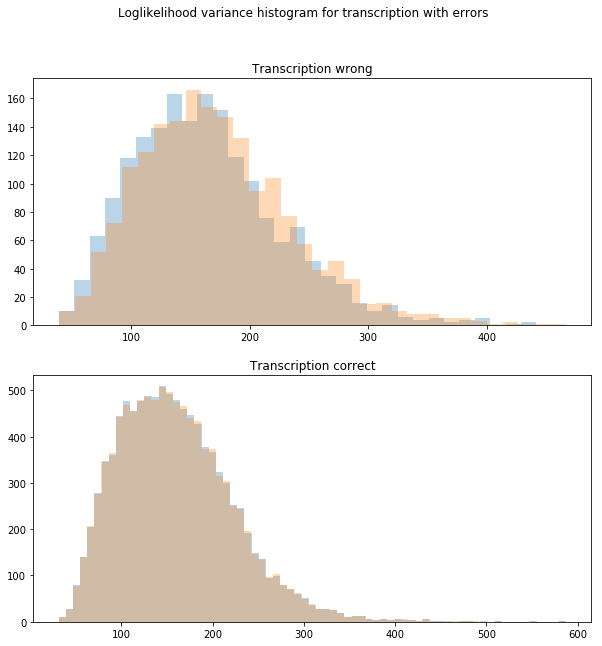

In [148]:
vTru = compute_var(dTru)
vFal = compute_var(dFal)
qTru = compute_var(sTru)
qFal = compute_var(sFal)

fig0, axarr0 = plt.subplots(2, 1, figsize=(10, 10))
axarr0[0].hist(vTru, alpha=0.3, bins='auto')
axarr0[0].hist(vFal, alpha=0.3, bins='auto')
axarr0[0].set_title('Transcription wrong')
axarr0[1].hist(qTru, alpha=0.3, bins='auto')
axarr0[1].hist(qFal, alpha=0.3, bins='auto')
axarr0[1].set_title('Transcription correct')
plt.suptitle('Loglikelihood variance histogram for transcription with errors')
plt.show()

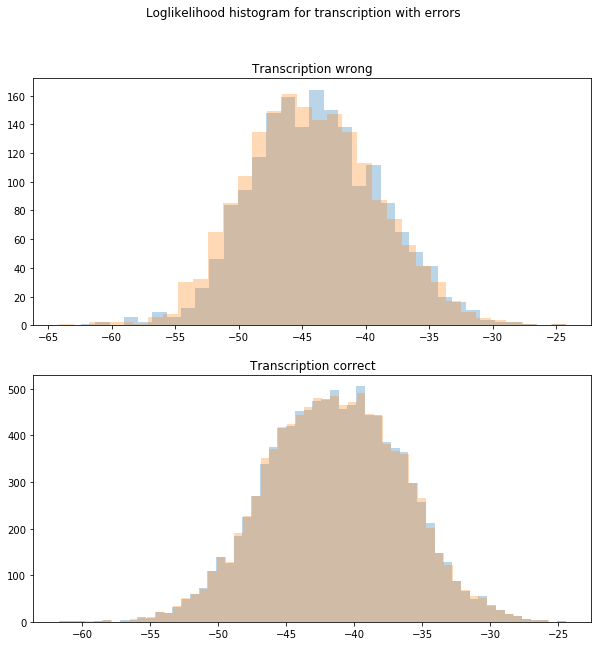

In [84]:
vTru = np.asarray(list(dTru.values()))
vFal = np.asarray(list(dFal.values()))
qTru= np.asarray(list(sTru.values()))
qFal = np.asarray(list(sFal.values()))

fig, axarr = plt.subplots(2, 1, figsize=(10, 10))
axarr[0].hist(vTru, alpha=0.3, bins='auto')
axarr[0].hist(vFal, alpha=0.3, bins='auto')
axarr[0].set_title('Transcription wrong')
axarr[1].hist(qTru, alpha=0.3, bins='auto')
axarr[1].hist(qFal, alpha=0.3, bins='auto')
axarr[1].set_title('Transcription correct')
plt.suptitle('Loglikelihood histogram for transcription with errors')
plt.show()

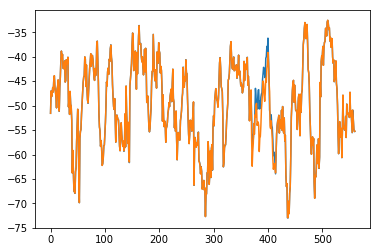

In [155]:
plt.plot(dTru['37_5622_20170914122859.wav'])
plt.plot(dFal['37_5622_20170914122859.wav'] )
plt.show()

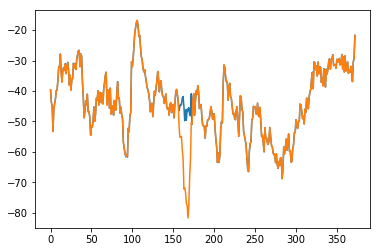

In [156]:
plt.plot(dTru['37_5622_20170913204509.wav'])
plt.plot(dFal['37_5622_20170913204509.wav'])
plt.show()


In [164]:
np.log(np.exp(-200000) + np.exp(-1500000))

/home/jyang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


-inf

In [189]:
def logsumexp(vec):
    return vec.max() + np.log(np.exp(vec - vec.max()).sum())

In [190]:
vec = np.array([-200000, -1500000])
print (logsumexp(vec))

-200000.0


In [186]:
a=np.array([-20000, -1500000])
np.log(np.exp(a-a.max()).sum())

0.0